In [1]:
using Plots; pythonplot
using LaTeXStrings
#using PyPlot


In [2]:
function rcParam(pyplot)
    rcParams = pyplot.PyDict(pyplot.matplotlib."rcParams")
    rcParams["text.usetex"] = true
    rcParams["text.latex.preamble"] = "\\usepackage[T1]{fontenc} \\usepackage{newtxtext} \\usepackage{newtxmath}"
    rcParams["xtick.top"] = true
    rcParams["ytick.right"] = true
    rcParams["xtick.minor.visible"] = true
    rcParams["ytick.minor.visible"] =  true
    pyplot.svg(true)
    return nothing
end
#rcParam(PyPlot)

rcParam (generic function with 1 method)

In [3]:
const me = 9.1094e-31 # Unit: kg
const L = 8e-10 # Unit: m
const hbar = 1.0546e-34 # Unit: Js
#const V0 = 20 # Unit: eV
const q = 1.602e-19; # Unit: J

k(E) = sqrt(2*0.510e6*E + 0im)

k (generic function with 1 method)

In [4]:
function deno_of_T!(E; V0=20.0)
    eps = 1e-20
    kp = sqrt(2 * me * q * (E + V0) + 0im) / hbar
    k = sqrt(2 * me * q * E + 0im) / hbar # Unit: m^-1
    denoT = cos(kp * L) - 1im / 2.0 * (k / (kp + eps) + kp / (k + eps)) * sin(kp * L)

    if abs(real(denoT)) <= eps && abs(imag(denoT)) <= eps
        return [0.0, 0.0]
    elseif abs(imag(denoT)) <= eps
        return [real(denoT), 0.0]
    else
        return [real(denoT), imag(denoT)]
    end
end


function T!(w; V0=20)
    eps = 1e-8
    denoT = deno_of_T!(w, V0=V0)

    return 1 / (denoT[1] + denoT[2] * 1im + eps)
end

T! (generic function with 1 method)

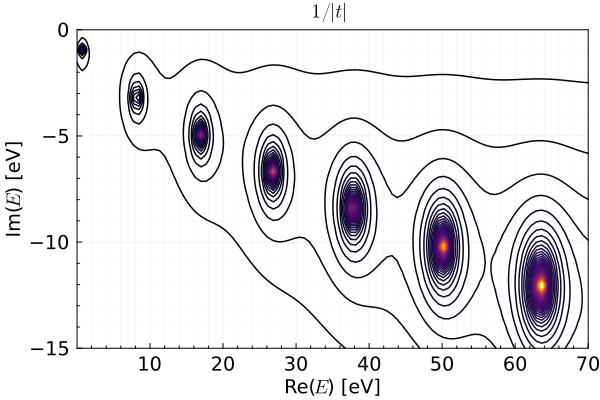

In [6]:
default(framestyle = :box, minorgrid = true, fg_color_legend = :lightgray, titlefont=font(13,"Computer Modern"), xtickfontsize=13,ytickfontsize=13,
guidefontsize=13);


dim = 100
reE = range(0.01, 70.0, dim)
imE = range(-15.0, 0.0, dim)

magn =  @. abs(T!(reE'+imE*1im) )
#figure()
p = contour(reE, imE, magn, levels=100, cbar=false, lw=1.5)
title!(L"$1/|t|$")
xlabel!(L"Re($E$) [eV]")
ylabel!(L"Im($E$) [eV]")
savefig("../figure/Two_dims_pole_str.png")
#display(gcf())
p
